In [73]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohamadalhasan/a-fake-news-dataset-around-the-syrian-war")

print("Path to dataset files:", path)

Path to dataset files: /Users/lavu/.cache/kagglehub/datasets/mohamadalhasan/a-fake-news-dataset-around-the-syrian-war/versions/1


In [74]:
import pandas as pd
df= pd.read_csv('/Users/lavu/Documents/github/ML_Projects/MachineLearning/data/news.csv',encoding='latin-1')
print(df.head())
print(df.info())
df.columns


      unit_id                                      article_title  \
0  1914947530  Syria attack symptoms consistent with nerve ag...   
1  1914947532  Homs governor says U.S. attack caused deaths b...   
2  1914947533    Death toll from Aleppo bomb attack at least 112   
3  1914947534        Aleppo bomb blast kills six Syrian state TV   
4  1914947535  29 Syria Rebels Dead in Fighting for Key Alepp...   

                                     article_content source       date  \
0  Wed 05 Apr 2017 Syria attack symptoms consiste...    nna   4/5/2017   
1  Fri 07 Apr 2017 at 0914 Homs governor says U.S...    nna   4/7/2017   
2  Sun 16 Apr 2017 Death toll from Aleppo bomb at...    nna  4/16/2017   
3  Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...    nna  4/19/2017   
4  Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...    nna  7/10/2016   

  location  labels  
0    idlib       0  
1     homs       0  
2   aleppo       0  
3   aleppo       0  
4   aleppo       0  
<class 'pandas.core.

Index(['unit_id', 'article_title', 'article_content', 'source', 'date',
       'location', 'labels'],
      dtype='object')

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from matplotlib import pyplot as plt



In [76]:
df= df.dropna(subset=['article_title','article_content','labels']) # Drops all the None values or missing numbers in the columns of the given headings
df['combined_text'] = df['article_title'] + ' ' + df['article_content']
X = df['combined_text']
y = df['labels']

In [77]:
# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data to TF-IDF features
#tf = common terms in the document will be down-weighted
#idf = rare terms in the document will be up-weighted
#Converts each document into a vector of numbers
# Each number = TF-IDF score for a word
# Resulting matrix = num_documents × num_feature
vectorizer = TfidfVectorizer(stop_words='english', max_features=15000, ngram_range=(1,2), max_df=0.7, min_df=5)
X_train_tfidf=vectorizer.fit_transform(X_train)
X_test_tfidf=vectorizer.transform(X_test)



In [79]:
#model initialization
model=GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, max_depth=3, random_state=42)
#model fitting
model.fit(X_train_tfidf, y_train)

,loss,'log_loss'
,learning_rate,0.05
,n_estimators,500
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [80]:
import seaborn as sns

predictions = model.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.49      0.51      0.50        72
           1       0.59      0.57      0.58        89

    accuracy                           0.55       161
   macro avg       0.54      0.54      0.54       161
weighted avg       0.55      0.55      0.55       161

Accuracy: 0.546583850931677


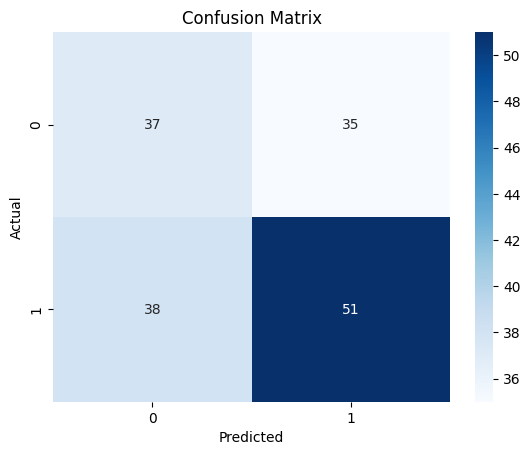

In [81]:
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [82]:
# Example article
new_article_title = "Breaking: Major Bomb Blast in Aleppo"
new_article_content = "At least 50 people were injured in the sudden explosion in Aleppo city center today..."

# Combine title + content (same as training)
new_article = new_article_title + " " + new_article_content

# Transform the new article using trained TF-IDF
new_article_tfidf = vectorizer.transform([new_article])

prediction = model.predict(new_article_tfidf)
prediction_proba = model.predict_proba(new_article_tfidf)  # probability for each class

# Print result
if prediction[0] == 0:
    print("The article is Real 🟢")
else:
    print("The article is Fake 🔴")

print("Prediction probabilities:", prediction_proba)




The article is Fake 🔴
Prediction probabilities: [[0.16548172 0.83451828]]


In [83]:
# Count of each label
label_counts = df['labels'].value_counts()
print(label_counts)


labels
1    426
0    378
Name: count, dtype: int64
